In [92]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import pandas

In [93]:

def readOnsetCSV(audiofilename,onsetcsv, smoothcsv):

    smootheddf = pandas.read_csv(smoothcsv,header=None)
    smoothedVals = smootheddf.values
    
    sig , sr = librosa.load(audiofilename,mono=True,sr=None)

    onsetdf = pandas.read_csv(onsetcsv,header=None)
    onsettimes = onsetdf.loc[:,0]

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    plt.title('Estimated from Sonic Visualiser')
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(onsettimes, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    plt.plot(smoothedVals[:,0],smoothedVals[:,1], label='Detection Function')
    plt.legend(frameon=True, framealpha=0.75)
    
    return sig, sr, onsettimes

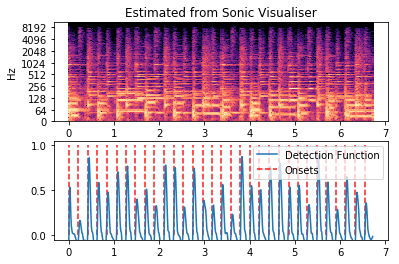

In [94]:
sig, sr, onsettimes = readOnsetCSV('kingsLoop.wav', 'kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')

In [95]:
y, sr = librosa.load('kingsLoop.wav')
samp = np.zeros(len(y))
sampLoc=librosa.time_to_samples(onsettimes.values, sr=sr)
samp[sampLoc]=1
IPython.display.Audio(data=samp, rate=sr)

In [90]:
newSig=np.zeros((len(y),2))
newSig[:,0]=samp
newSig[:,1]=y
meanNewSig=np.mean(newSig,1)


#newSig=np.vstack((samp,y))
IPython.display.Audio(data=meanNewSig, rate=sr)

In [86]:
def clickAll(audiofile,onsetcsv,smoothcsv):
    sig, sr, onsettimes = readOnsetCSV(audiofile,onsetcsv, smoothcsv)
    samp = np.zeros(len(sig))
    sampLoc=librosa.time_to_samples(onsettimes.values, sr=sr)
    samp[sampLoc]=1
    newSig=np.zeros((len(sig),2))
    newSig[:,0]=samp
    newSig[:,1]=sig
    meanNewSig=np.mean(newSig,1)
    return meanNewSig, sr

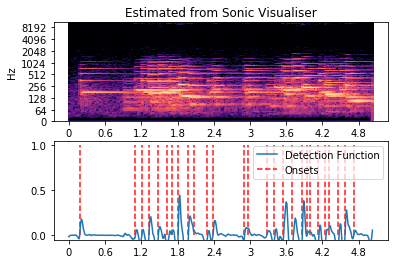

In [89]:
meanNewSig, sr = clickAll('chopinSeg.wav','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')
IPython.display.Audio(data=meanNewSig, rate=sr)

In [105]:
chopintensitydf = pandas.read_csv("chopinSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv",header=None)
chopintensityVals = chopintensitydf.values
choploudnessdf = pandas.read_csv("chopinSeg_vamp_vamp-libxtract_loudness_loudness.csv", header=None)
choploudnessVals = choploudnessdf.values
choprmsdf = pandas.read_csv("chopinSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv",header=None) 
choprmsVals = choprmsdf.values


mozintensitydf = pandas.read_csv("mozartSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv",header=None)
mozintensityVals = mozintensitydf.values
mozloudnessdf = pandas.read_csv("mozartSeg_vamp_vamp-libxtract_loudness_loudness.csv", header=None)
mozloudnessVals = mozloudnessdf.values
mozrmsdf = pandas.read_csv("mozartSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv",header=None) 
mozrmsVals = mozrmsdf.values


avmintensitydf = pandas.read_csv("avm_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv",header=None)
avmintensityVals = avmintensitydf.values
avmloudnessdf = pandas.read_csv("avm_vamp_vamp-libxtract_loudness_loudness.csv", header=None)
avmloudnessVals = avmloudnessdf.values
avmrmsdf = pandas.read_csv("avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv",header=None) 
avmrmsVals = avmrmsdf.values


kingintensitydf = pandas.read_csv("kingsLoop_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv",header=None)
kingintensityVals = kingintensitydf.values
kingloudnessdf = pandas.read_csv("kingsLoop_vamp_vamp-libxtract_loudness_loudness.csv", header=None)
kingloudnessVals = kingloudnessdf.values
kingrmsdf = pandas.read_csv("kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv",header=None) 
kingrmsVals = kingrmsdf.values

In [26]:
def plotLoudness (file, intensityVals, rmsVals, loudnessVals):
    
    sig2 , sr2 = librosa.load(file,mono=True,sr=None)
    plt.figure()
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log',cmap='gray')
    plt.hold
    plt.plot(intensityVals[:,0],intensityVals[:,1],color = 'm')
    plt.plot(rmsVals[:,0],rmsVals[:,1]*1000,color = 'g')
    plt.plot(loudnessVals[:,0],loudnessVals[:,1]*100, color = 'r')
    
    return 

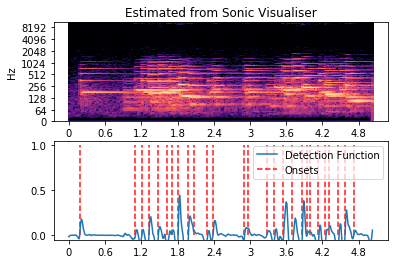

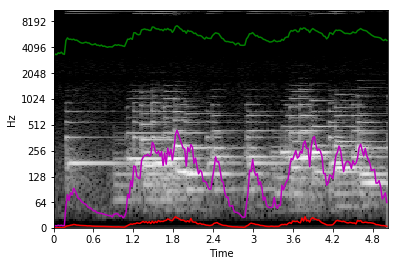

In [104]:
meanNewSig, sr = clickAll('chopinSeg.wav','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')
plotLoudness ("chopinSeg.wav",chopintensityVals,choploudnessVals,choprmsVals)
IPython.display.Audio(data=meanNewSig, rate=sr)


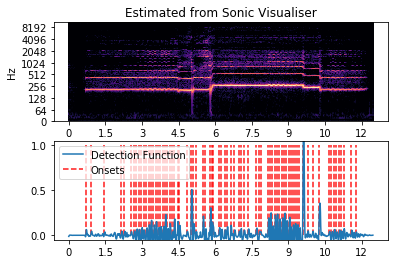

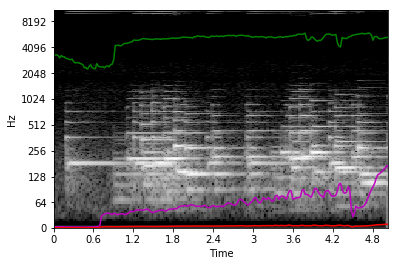

In [106]:
meanNewSig2, sr = clickAll('avm.wav','avm_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','avm_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')
plotLoudness ("avm.wav",avmintensityVals,avmloudnessVals,avmrmsVals)
IPython.display.Audio(data=meanNewSig2, rate=sr)

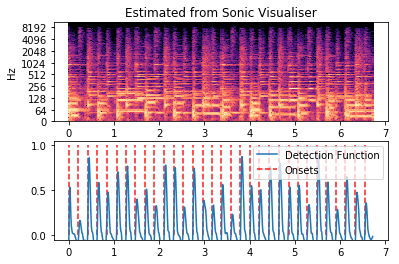

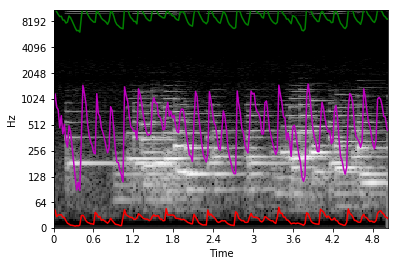

In [108]:
meanNewSig3, sr = clickAll('kingsLoop.wav','kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')
plotLoudness ("kingsLoop.wav",kingintensityVals,kingloudnessVals,kingrmsVals)
IPython.display.Audio(data=meanNewSig3, rate=sr)

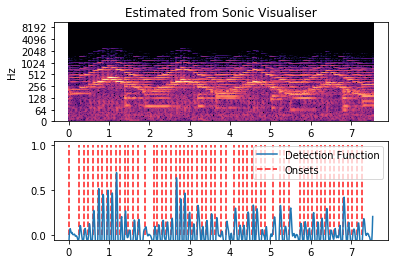

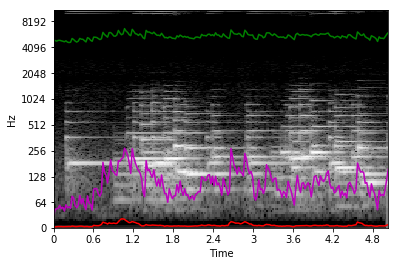

In [110]:
meanNewSig4, sr = clickAll('mozartSeg.wav','mozartSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','mozartSeg_vamp_qm-vamp-plugins_qm-onsetdetector_smoothed_df.csv')
plotLoudness ("mozartSeg.wav",mozintensityVals,mozloudnessVals,mozrmsVals)
IPython.display.Audio(data=meanNewSig4, rate=sr)